In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind

In [4]:
import sys
sys.path.append('../src')
from functions import *

# Loading the Data

In [5]:
sys.path.append('../src')
df_test_final = pd.read_csv('../Data/raw/df_test_final.csv')
df_control_final = pd.read_csv('../Data/raw/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [6]:
# Convert specified columns to integer data type
df_control_final['client_id'] = df_control_final['client_id'].astype(object)
df_control_final['visit_visitor_id'] = df_control_final['visit_visitor_id'].astype(object)
df_control_final['start_time'] = round(df_control_final['start_time'].astype(float),2)
df_control_final['step_1'] = round(df_control_final['step_1'].astype(float),2)
df_control_final['step_2'] = round(df_control_final['step_2'].astype(float),2)
df_control_final['step_3'] = round(df_control_final['step_3'].astype(float),2)
df_control_final['date'] = pd.to_datetime(df_control_final.date)
df_control_final['bt_1'] = df_control_final['bt_1'].astype(int)
df_control_final['bt_2'] = df_control_final['bt_2'].astype(int)
df_control_final['bt_3'] = df_control_final['bt_3'].astype(int)
df_control_final['total_navigation'] = df_control_final['total_navigation'].astype(int)
df_control_final['last_step'] = df_control_final['last_step'].astype(object)
df_control_final['completion'] = df_control_final['completion'].astype(bool)
df_control_final['total_time_visit'] = round(df_control_final['total_time_visit'].astype(float),2)
df_control_final['Variation'] = df_control_final['Variation'].astype(object)
df_control_final['clnt_tenure_yr'] = df_control_final['clnt_tenure_yr'].astype(int)
df_control_final['clnt_tenure_mnth'] = df_control_final['clnt_tenure_mnth'].astype(int)
df_control_final['clnt_age'] = df_control_final['clnt_age'].astype(int)
df_control_final['gendr'] = df_control_final['gendr'].astype(object)
df_control_final['num_accts'] = df_control_final['num_accts'].astype(int)
df_control_final['calls_6_mnth'] = df_control_final['calls_6_mnth'].astype(int)
df_control_final['logons_6_mnth'] = df_control_final['logons_6_mnth'].astype(int)

In [7]:
df_control_final.dtypes

client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

## Categorical columns

In [8]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'Variation', 'gendr'], dtype='object')

In [9]:
control_categorical_columns = ['last_step', 'gendr']

In [10]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    37122
client_id           26912
last_step               5
gendr                   3
Variation               1
dtype: int64

In [9]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    21435
start       9448
step_1      3136
step_3      1782
step_2      1321
Name: count, dtype: int64
Proportion: last_step
confirm    0.577420
start      0.254512
step_1     0.084478
step_3     0.048004
step_2     0.035585
Name: proportion, dtype: float64


In [10]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
M        12642
Other    12309
F        12171
Name: count, dtype: int64
Proportion: gendr
M        0.340553
Other    0.331582
F        0.327865
Name: proportion, dtype: float64


In [11]:
cross_table(df_control_final, 'start_time')

,start_time,count
0,0.00,7120
1,0.02,32
2,0.03,98
3,0.05,658
4,0.07,1186
...,...,...
1172,113.70,1
1173,116.25,1
1174,117.27,1
1175,129.97,1


In [12]:
frequency_proportion(df_control_final, 'start_time')

Frequency:start_time
0.00      7120
0.15      1390
0.13      1375
0.12      1335
0.10      1310
          ... 
11.10        1
31.97        1
54.38        1
28.83        1
117.27       1
Name: count, Length: 1177, dtype: int64
Proportion: start_time
0.00      0.191800
0.15      0.037444
0.13      0.037040
0.12      0.035963
0.10      0.035289
            ...   
11.10     0.000027
31.97     0.000027
54.38     0.000027
28.83     0.000027
117.27    0.000027
Name: proportion, Length: 1177, dtype: float64


In [13]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,21435
1,start,9448
2,step_1,3136
3,step_2,1321
4,step_3,1782


In [14]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_last_step['count'] / tab_control_last_step['count'].sum()).round(2)

0    0.58
1    0.25
2    0.08
3    0.04
4    0.05
Name: count, dtype: float64

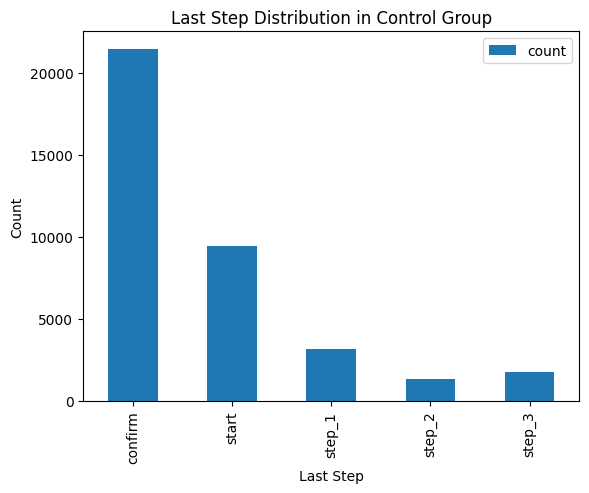

In [15]:
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()

In [16]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,12171
1,M,12642
2,Other,12309


In [17]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.33
1    0.34
2    0.33
Name: count, dtype: float64

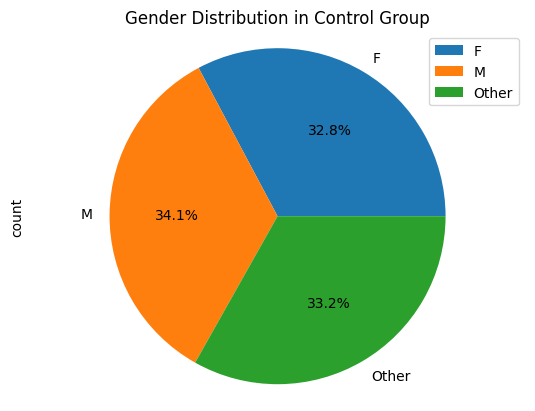

In [18]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

In [19]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3',
       'total_navigation', 'total_time_visit', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

In [20]:
df_control_final.dtypes

client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

In [21]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3', 'total_navigation', 'total_time_visit', 'clnt_tenure_yr','clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
control_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

In [22]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

bal                 26861
total_time_visit     2257
step_3               1179
start_time           1177
step_1                911
step_2                780
clnt_tenure_mnth      444
clnt_age               80
clnt_tenure_yr         49
total_navigation       32
bt_1                   16
bt_2                   16
bt_3                   12
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [23]:
df_control_final.describe()

,start_time,step_1,step_2,step_3,date,bt_1,bt_2,bt_3,total_navigation,total_time_visit,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,37122.000000,37122.000000,37122.000000,37122.000000,37122,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,3.712200e+04,37122.000000,37122.000000
mean,1.276801,0.966051,1.176628,1.392183,2017-04-18 09:38:31.750444544,1.043936,0.834492,0.697376,2.575804,5.258382,12.341092,154.136927,48.304240,2.271268,1.702774e+05,3.280238,6.319056
min,0.000000,0.000000,0.000000,0.000000,2017-03-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,0.080000,0.000000,0.000000,0.000000,2017-04-04 00:00:00,1.000000,0.000000,0.000000,1.000000,0.850000,6.000000,82.000000,34.000000,2.000000,4.141517e+04,1.000000,4.000000
50%,0.200000,0.330000,0.720000,0.380000,2017-04-12 00:00:00,1.000000,1.000000,1.000000,3.000000,2.800000,11.000000,141.000000,50.000000,2.000000,7.049199e+04,3.000000,6.000000
75%,0.850000,0.850000,1.500000,1.215000,2017-04-25 00:00:00,1.000000,1.000000,1.000000,3.000000,5.900000,16.000000,195.000000,61.000000,2.000000,1.574725e+05,6.000000,9.000000
max,527.070000,225.580000,299.380000,119.350000,2017-06-20 00:00:00,24.000000,24.000000,16.000000,55.000000,527.070000,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000
std,5.295910,3.031265,3.003687,4.039087,NaN,0.924209,0.857183,0.731116,2.180503,9.810647,7.059982,84.387617,15.756931,0.553302,4.338776e+05,2.212187,2.197129


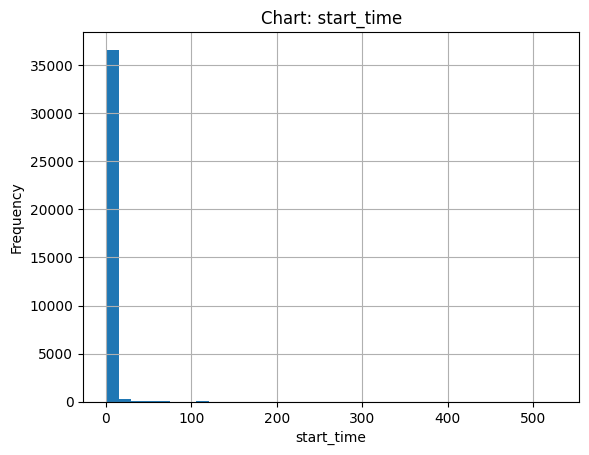

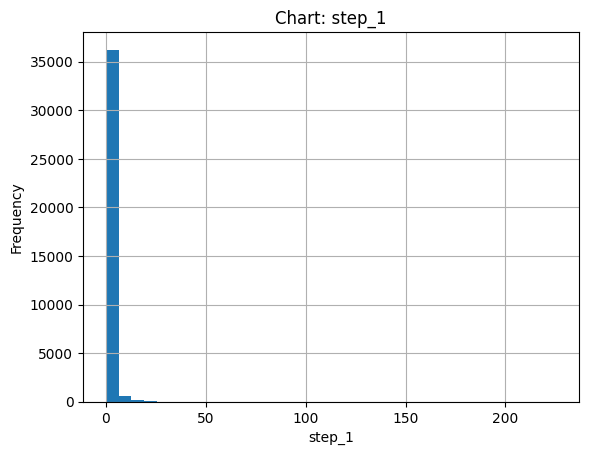

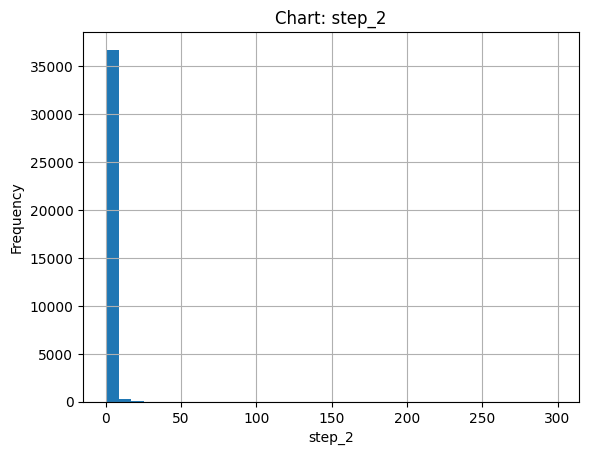

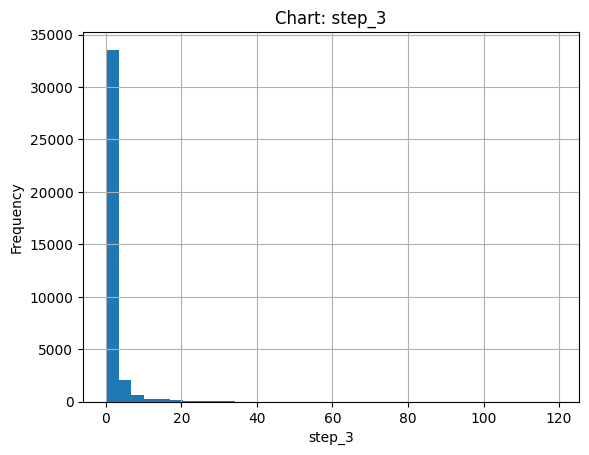

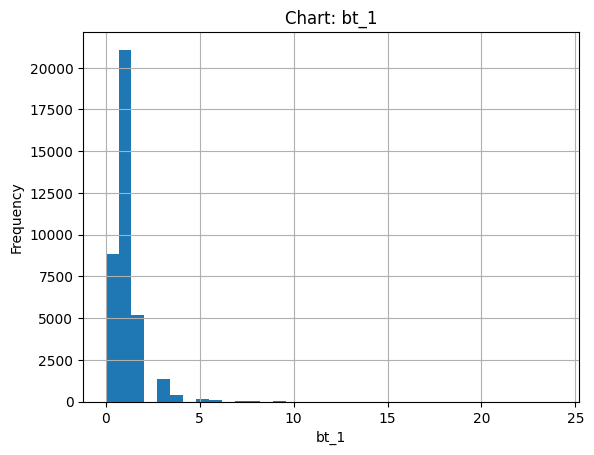

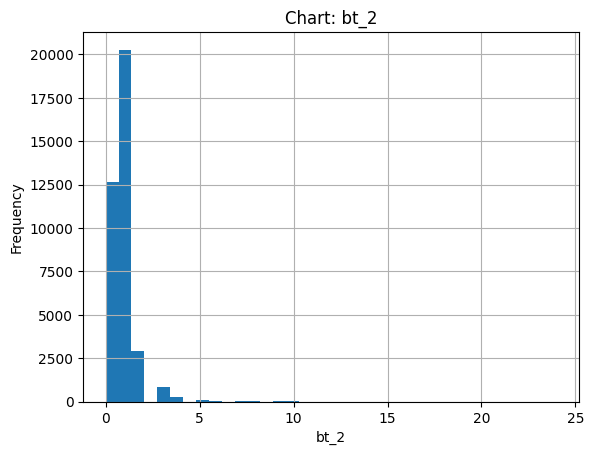

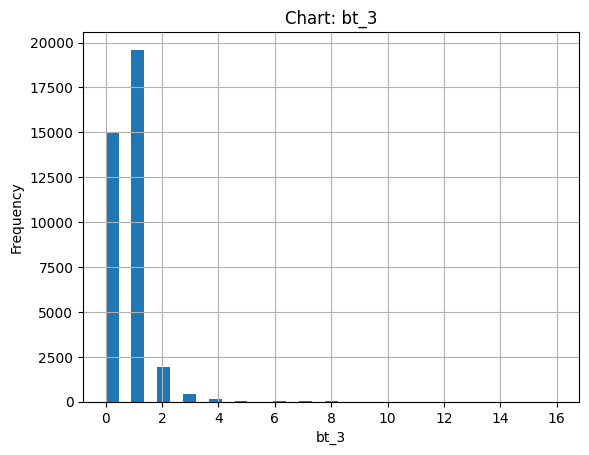

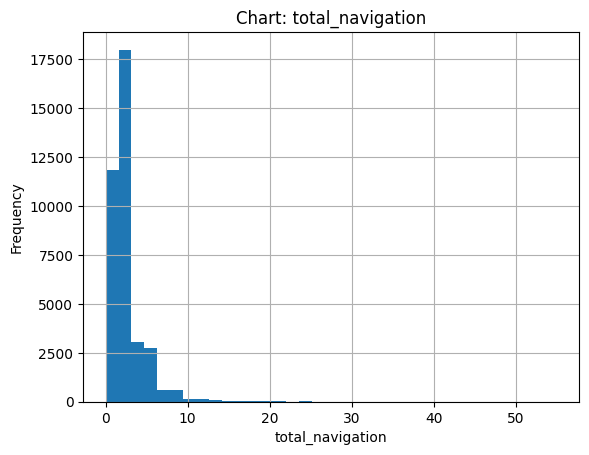

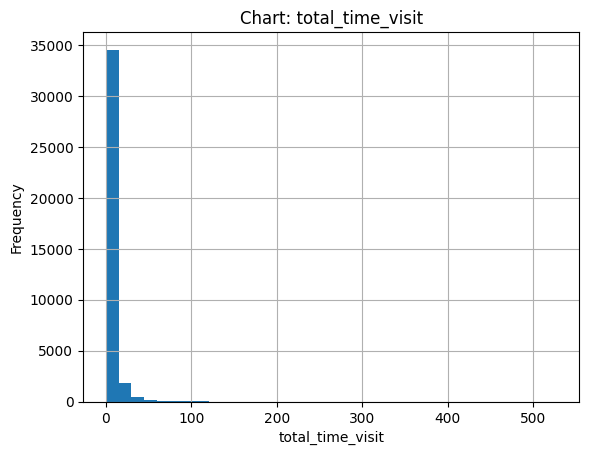

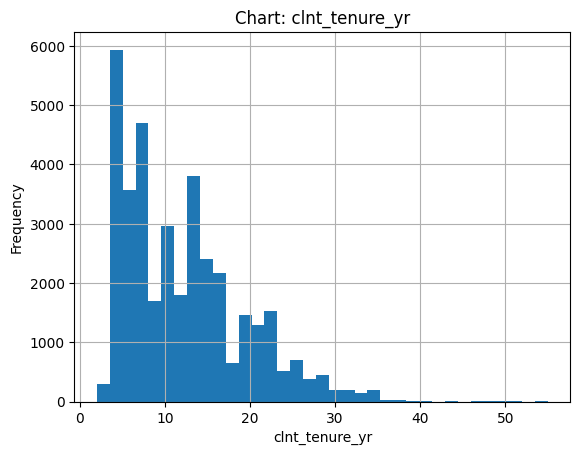

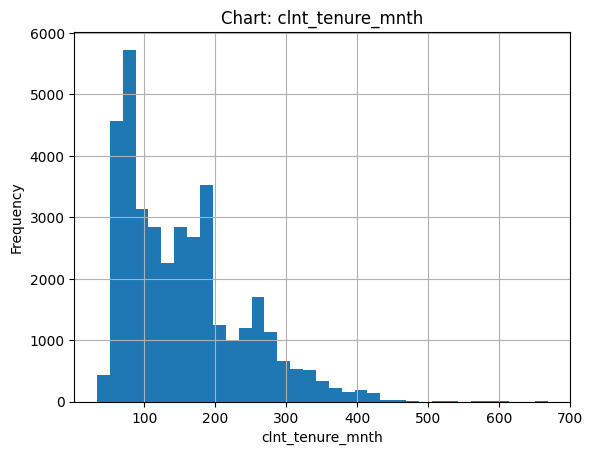

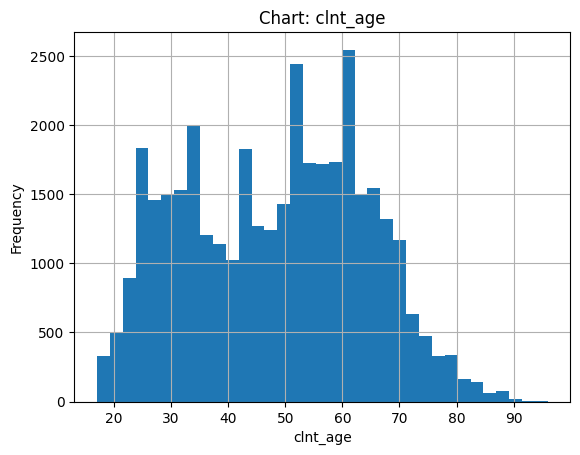

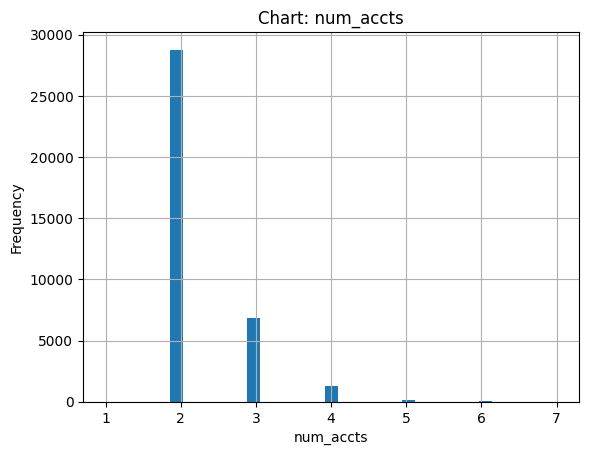

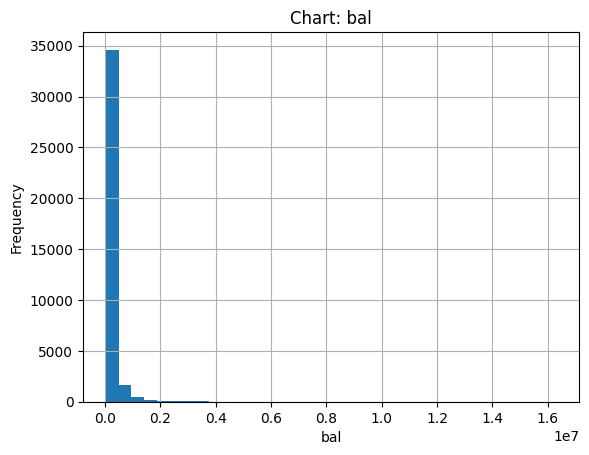

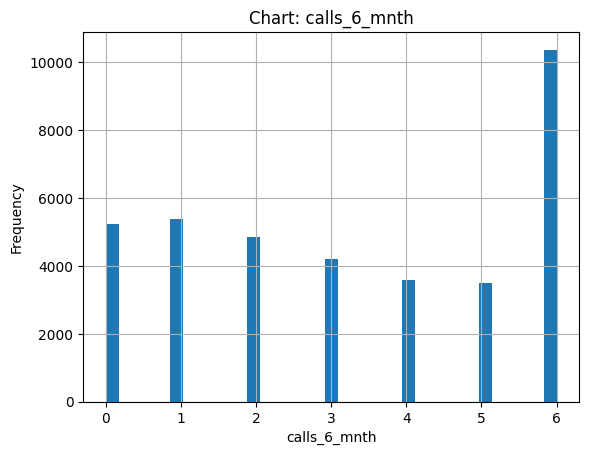

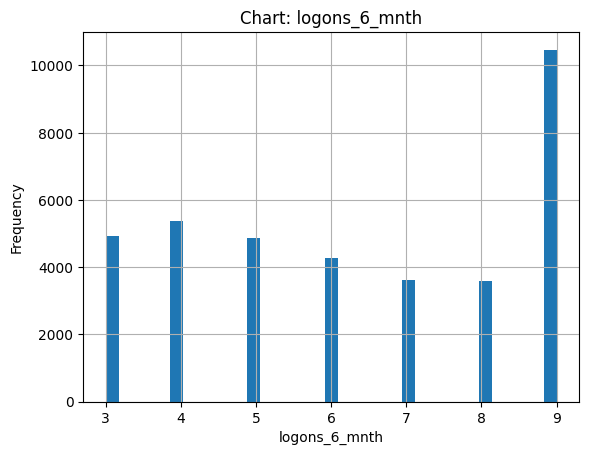

In [24]:
# Plot histograms for each numeric column with values on top
for column in control_numerical_columns:
    plt.figure()
    df_control_final[column].hist(bins=35)
    plt.title(f'Chart: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Check for outliers

In [25]:
control_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

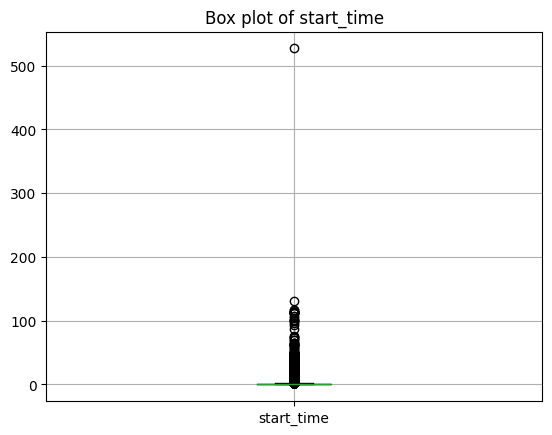

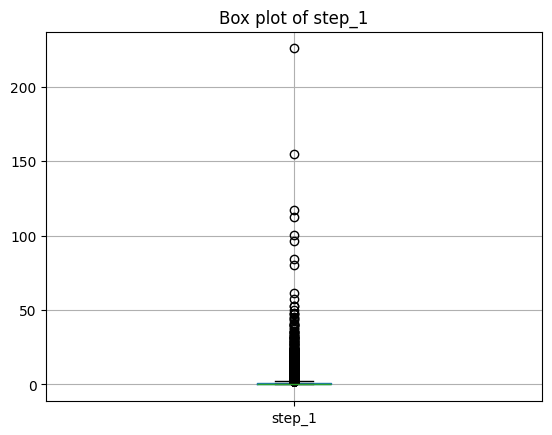

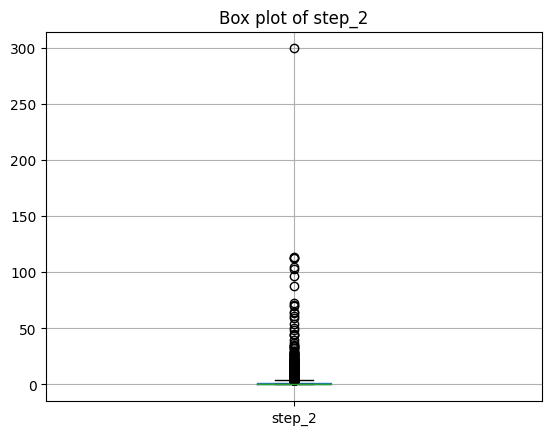

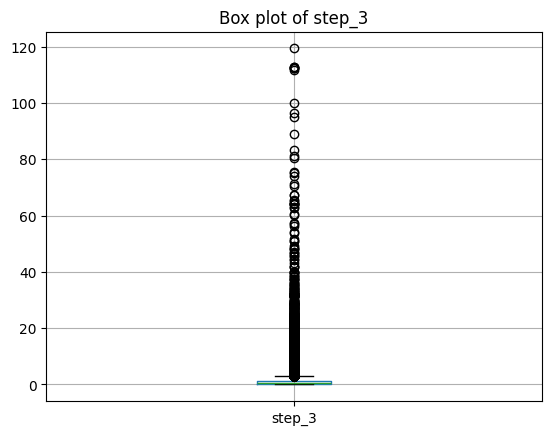

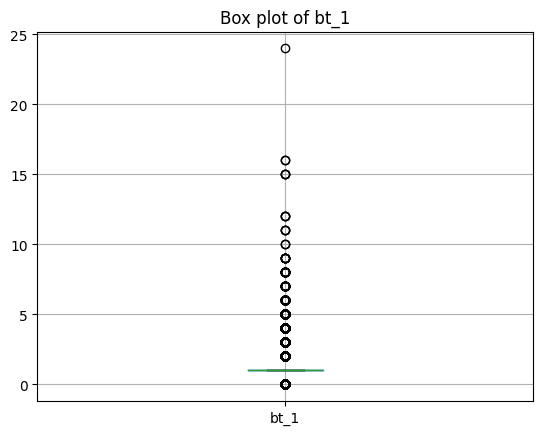

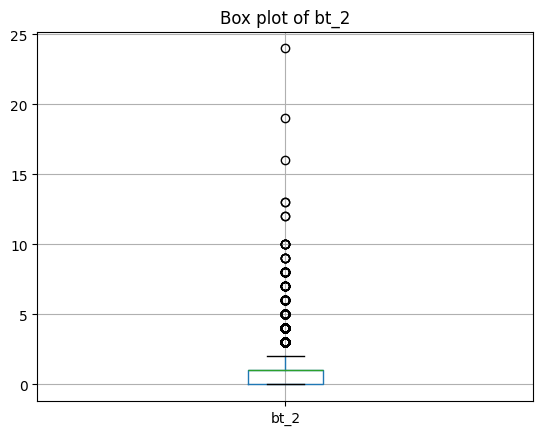

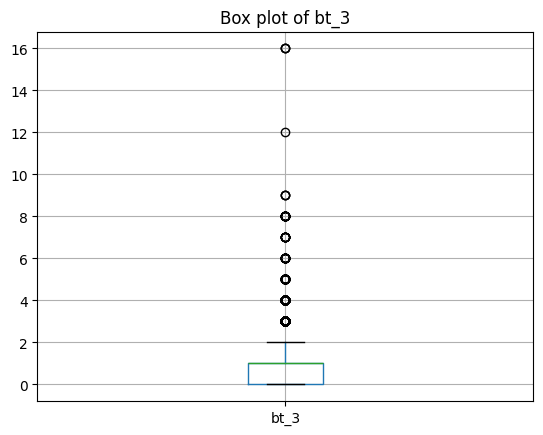

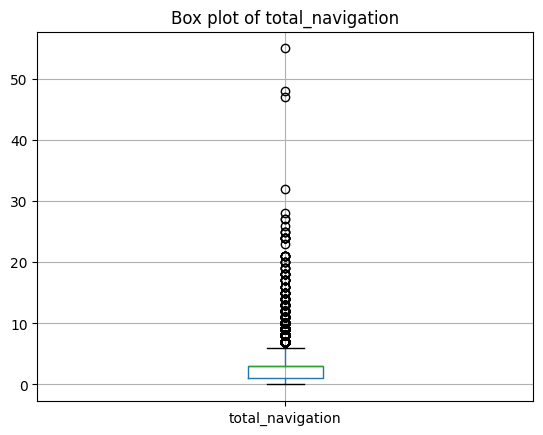

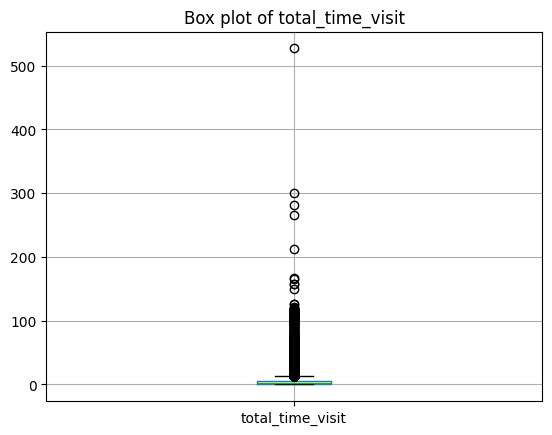

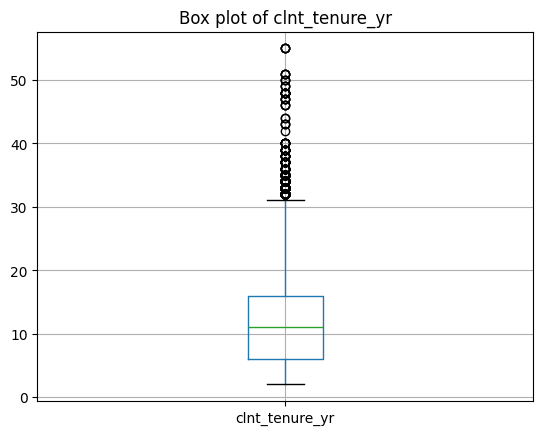

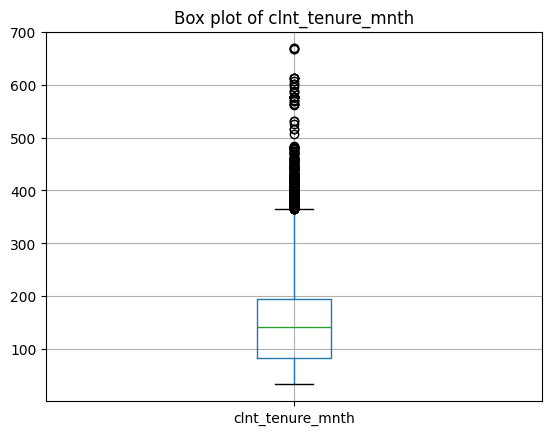

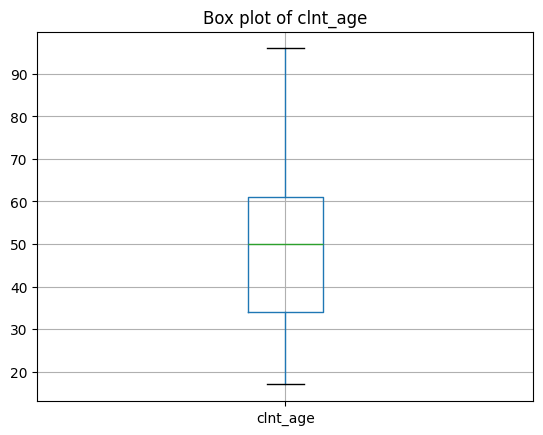

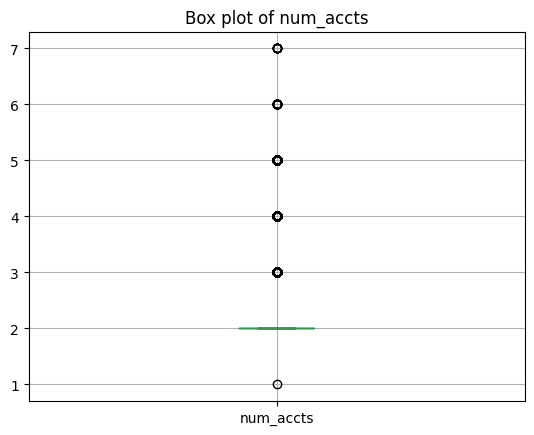

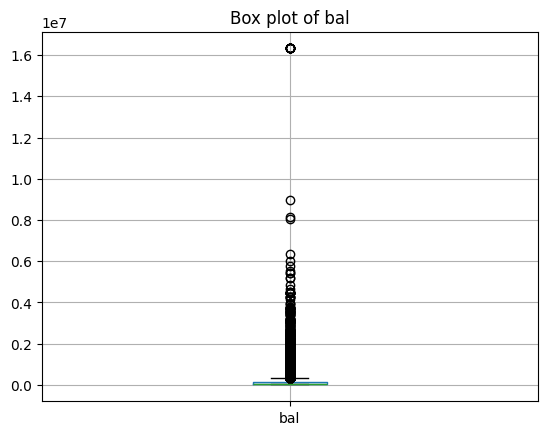

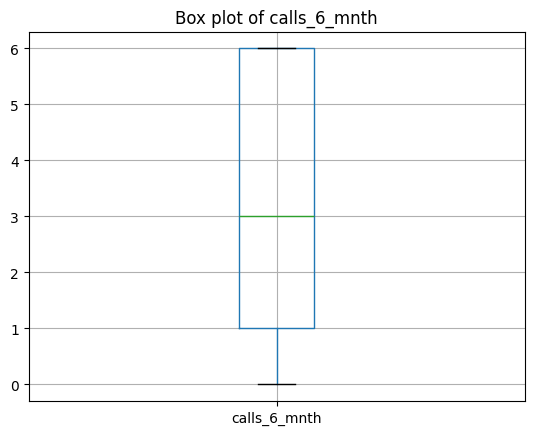

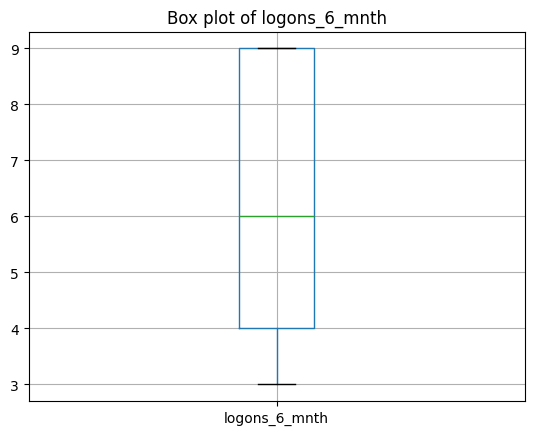

In [26]:
for column in control_numerical_columns:
    plt.figure()
    df_test_final.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

# FINAL OF THE CONTROL


# df_test

## Check the data types

## Univariate Analysis - df_test

In [27]:
# Convert specified columns to integer data type
df_test_final['client_id'] = df_test_final['client_id'].astype(object)
df_test_final['visit_visitor_id'] = df_test_final['visit_visitor_id'].astype(object)
df_test_final['start_time'] = round(df_test_final['start_time'].astype(float),2)
df_test_final['step_1'] = round(df_test_final['step_1'].astype(float),2)
df_test_final['step_2'] = round(df_test_final['step_2'].astype(float),2)
df_test_final['step_3'] = round(df_test_final['step_3'].astype(float),2)
df_test_final['date'] = pd.to_datetime(df_test_final.date)
df_test_final['bt_1'] = df_test_final['bt_1'].astype(int)
df_test_final['bt_2'] = df_test_final['bt_2'].astype(int)
df_test_final['bt_3'] = df_test_final['bt_3'].astype(int)
df_test_final['total_navigation'] = df_test_final['total_navigation'].astype(int)
df_test_final['last_step'] = df_test_final['last_step'].astype(object)
df_test_final['completion'] = df_test_final['completion'].astype(bool)
df_test_final['total_time_visit'] = round(df_test_final['total_time_visit'].astype(float),2)
df_test_final['Variation'] = df_test_final['Variation'].astype(object)
df_test_final['clnt_tenure_yr'] = df_test_final['clnt_tenure_yr'].astype(int)
df_test_final['clnt_tenure_mnth'] = df_test_final['clnt_tenure_mnth'].astype(int)
df_test_final['clnt_age'] = df_test_final['clnt_age'].astype(int)
df_test_final['gendr'] = df_test_final['gendr'].astype(object)
df_test_final['num_accts'] = df_test_final['num_accts'].astype(int)
df_test_final['calls_6_mnth'] = df_test_final['calls_6_mnth'].astype(int)
df_test_final['logons_6_mnth'] = df_test_final['logons_6_mnth'].astype(int)

In [28]:
df_test_final.dtypes


client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

## Categorical columns

In [29]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'Variation', 'gendr'], dtype='object')

In [30]:
test_categorical_columns = ['last_step', 'gendr']

In [31]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    37122
client_id           26912
last_step               5
gendr                   3
Variation               1
dtype: int64

In [32]:
frequency_proportion(df_test_final, 'last_step')

Frequency:last_step
confirm    21435
start       9448
step_1      3136
step_3      1782
step_2      1321
Name: count, dtype: int64
Proportion: last_step
confirm    0.577420
start      0.254512
step_1     0.084478
step_3     0.048004
step_2     0.035585
Name: proportion, dtype: float64


In [33]:
frequency_proportion(df_test_final, 'gendr')

Frequency:gendr
M        12642
Other    12309
F        12171
Name: count, dtype: int64
Proportion: gendr
M        0.340553
Other    0.331582
F        0.327865
Name: proportion, dtype: float64


In [34]:
cross_table(df_test_final, 'start_time')

,start_time,count
0,0.00,7120
1,0.02,32
2,0.03,98
3,0.05,658
4,0.07,1186
...,...,...
1172,113.70,1
1173,116.25,1
1174,117.27,1
1175,129.97,1


In [35]:
frequency_proportion(df_test_final, 'start_time')

Frequency:start_time
0.00      7120
0.15      1390
0.13      1375
0.12      1335
0.10      1310
          ... 
11.10        1
31.97        1
54.38        1
28.83        1
117.27       1
Name: count, Length: 1177, dtype: int64
Proportion: start_time
0.00      0.191800
0.15      0.037444
0.13      0.037040
0.12      0.035963
0.10      0.035289
            ...   
11.10     0.000027
31.97     0.000027
54.38     0.000027
28.83     0.000027
117.27    0.000027
Name: proportion, Length: 1177, dtype: float64


In [36]:
tab_test_last_step = cross_table(df_test_final, 'last_step')
tab_test_last_step

,last_step,count
0,confirm,21435
1,start,9448
2,step_1,3136
3,step_2,1321
4,step_3,1782


In [37]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum()).round(2)

0    0.58
1    0.25
2    0.08
3    0.04
4    0.05
Name: count, dtype: float64

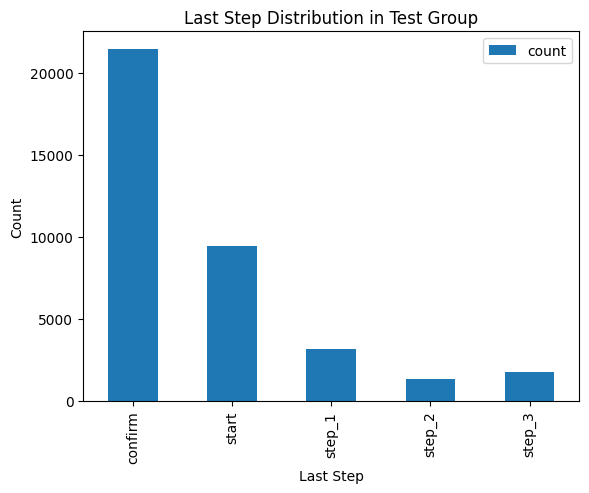

In [38]:
tab_test_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

In [39]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


,gendr,count
0,F,12171
1,M,12642
2,Other,12309


In [40]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

0    0.33
1    0.34
2    0.33
Name: count, dtype: float64

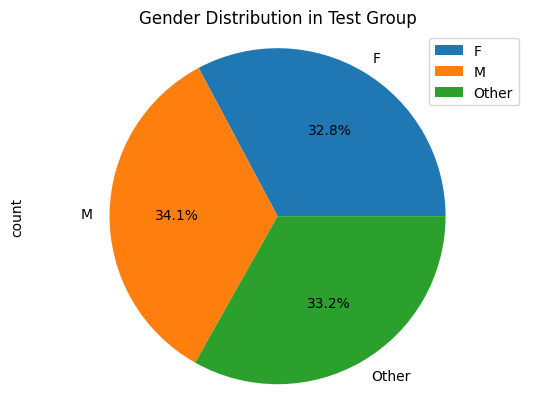

In [41]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [42]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3',
       'total_navigation', 'total_time_visit', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

In [43]:
df_test_final.dtypes

client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

In [44]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3', 'total_navigation', 'total_time_visit', 'clnt_tenure_yr','clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

In [45]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

In [46]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


bal                 26861
total_time_visit     2257
step_3               1179
start_time           1177
step_1                911
step_2                780
clnt_tenure_mnth      444
clnt_age               80
clnt_tenure_yr         49
total_navigation       32
bt_1                   16
bt_2                   16
bt_3                   12
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [47]:
df_test_final.describe()

,start_time,step_1,step_2,step_3,date,bt_1,bt_2,bt_3,total_navigation,total_time_visit,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,37122.000000,37122.000000,37122.000000,37122.000000,37122,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,37122.000000,3.712200e+04,37122.000000,37122.000000
mean,1.276801,0.966051,1.176628,1.392183,2017-04-18 09:38:31.750444544,1.043936,0.834492,0.697376,2.575804,5.258382,12.341092,154.136927,48.304240,2.271268,1.702774e+05,3.280238,6.319056
min,0.000000,0.000000,0.000000,0.000000,2017-03-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,0.080000,0.000000,0.000000,0.000000,2017-04-04 00:00:00,1.000000,0.000000,0.000000,1.000000,0.850000,6.000000,82.000000,34.000000,2.000000,4.141517e+04,1.000000,4.000000
50%,0.200000,0.330000,0.720000,0.380000,2017-04-12 00:00:00,1.000000,1.000000,1.000000,3.000000,2.800000,11.000000,141.000000,50.000000,2.000000,7.049199e+04,3.000000,6.000000
75%,0.850000,0.850000,1.500000,1.215000,2017-04-25 00:00:00,1.000000,1.000000,1.000000,3.000000,5.900000,16.000000,195.000000,61.000000,2.000000,1.574725e+05,6.000000,9.000000
max,527.070000,225.580000,299.380000,119.350000,2017-06-20 00:00:00,24.000000,24.000000,16.000000,55.000000,527.070000,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000
std,5.295910,3.031265,3.003687,4.039087,NaN,0.924209,0.857183,0.731116,2.180503,9.810647,7.059982,84.387617,15.756931,0.553302,4.338776e+05,2.212187,2.197129


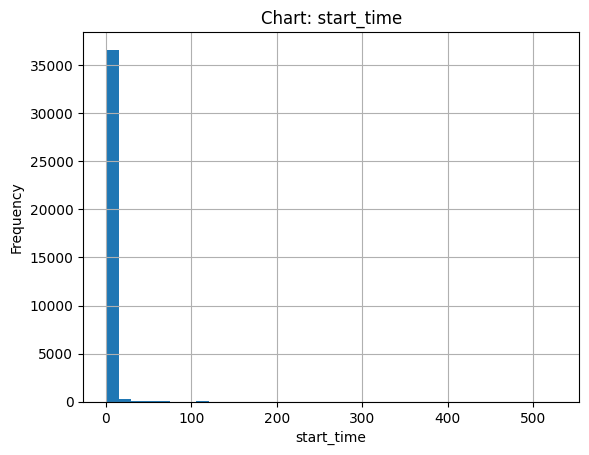

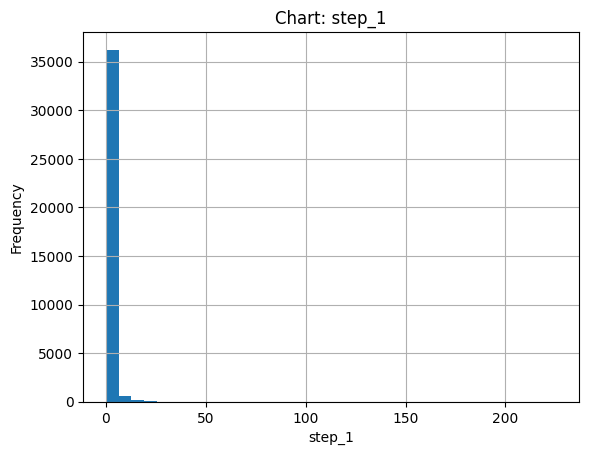

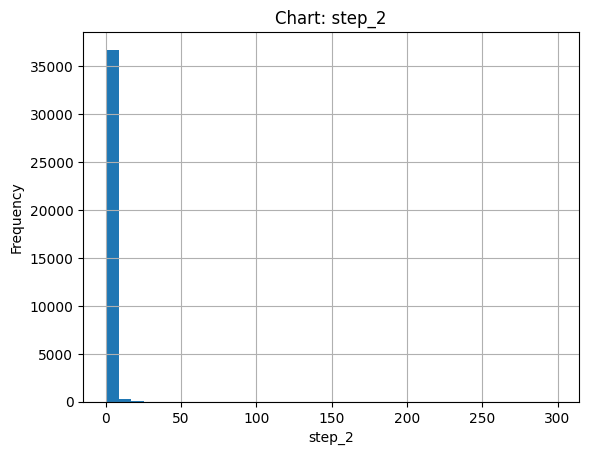

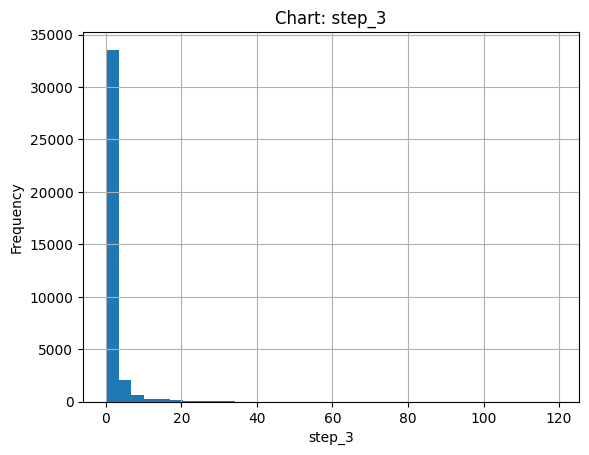

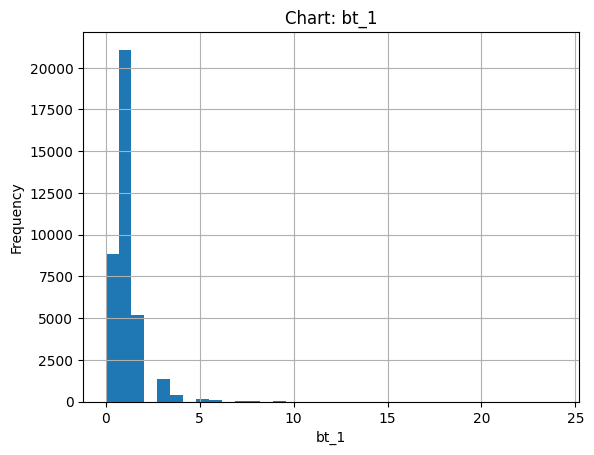

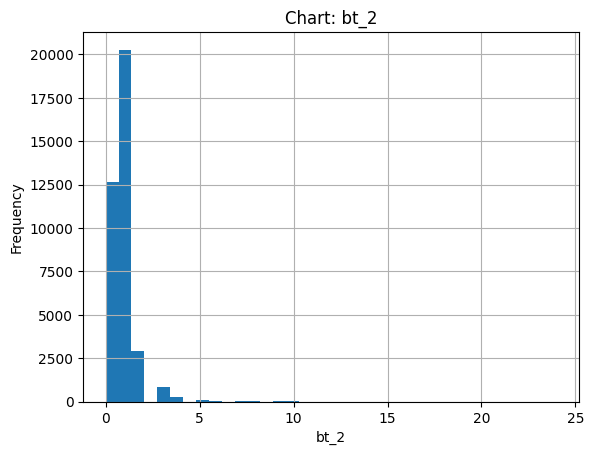

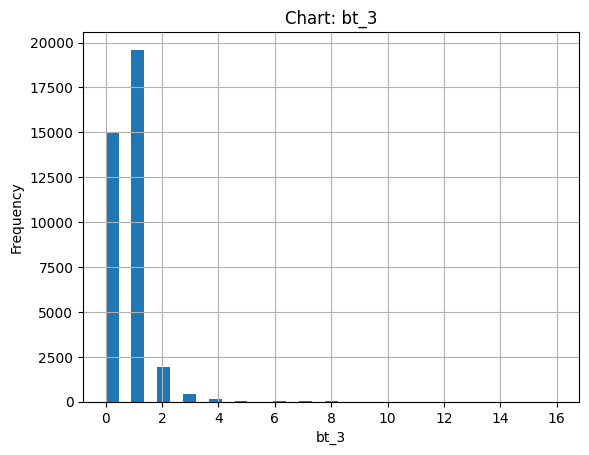

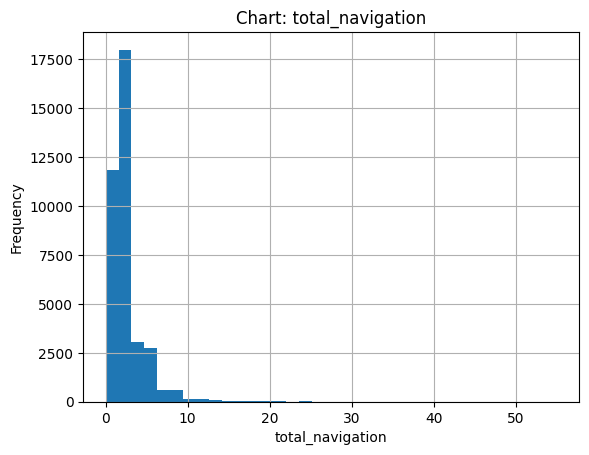

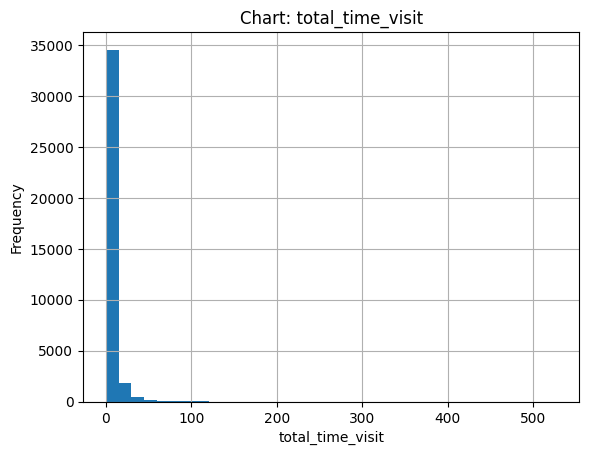

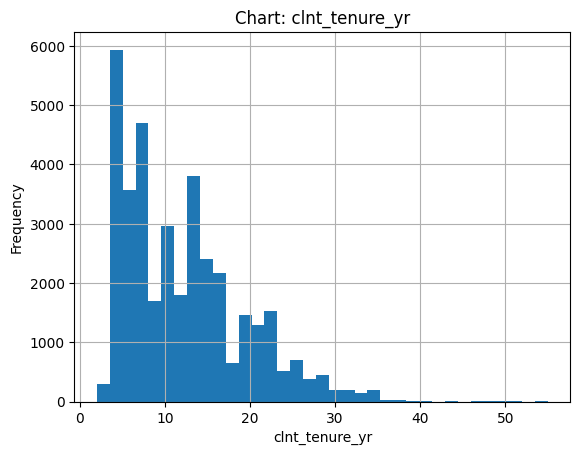

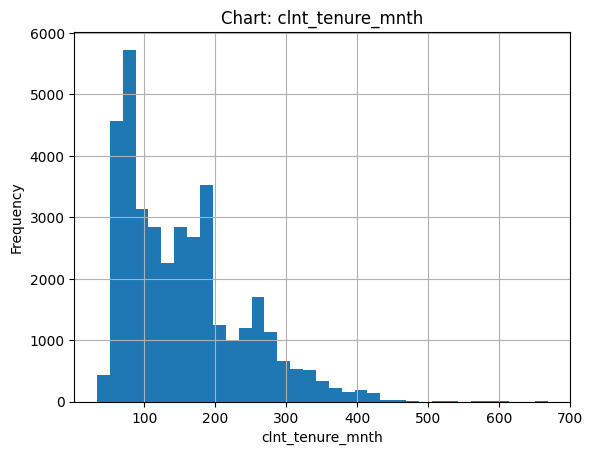

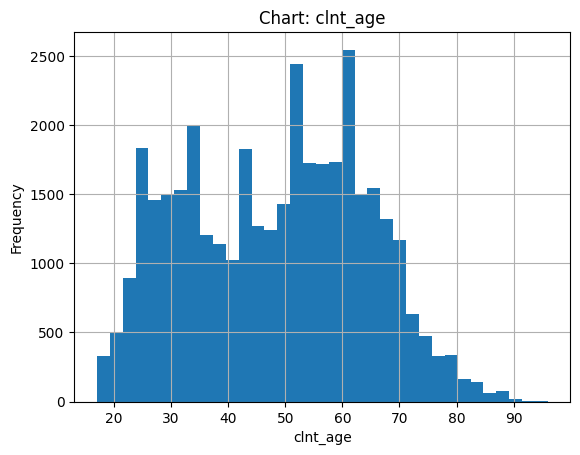

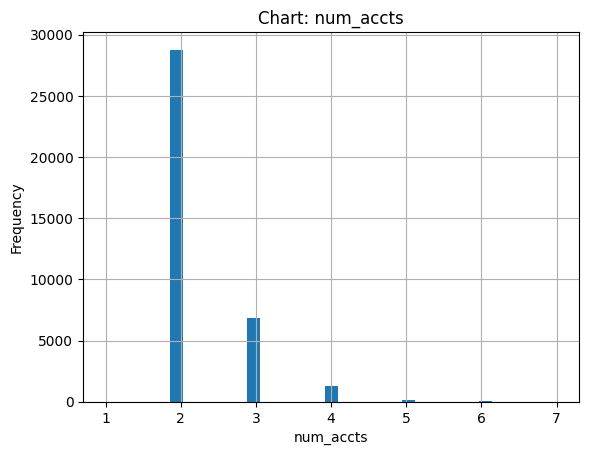

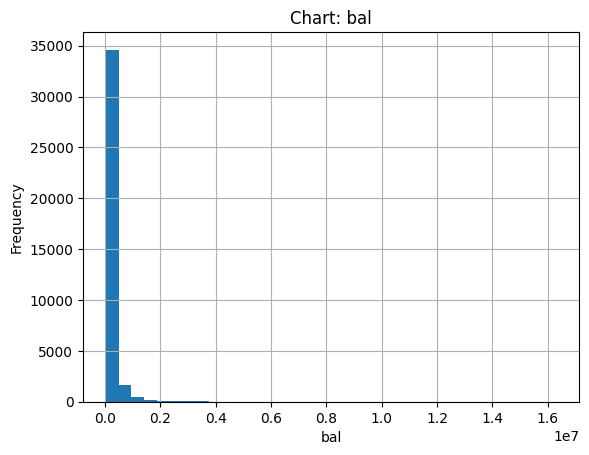

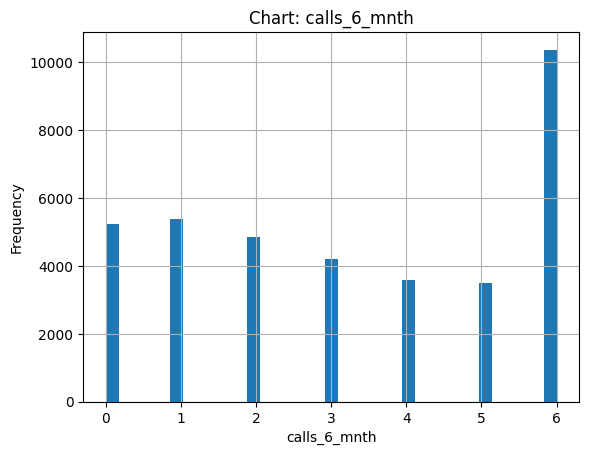

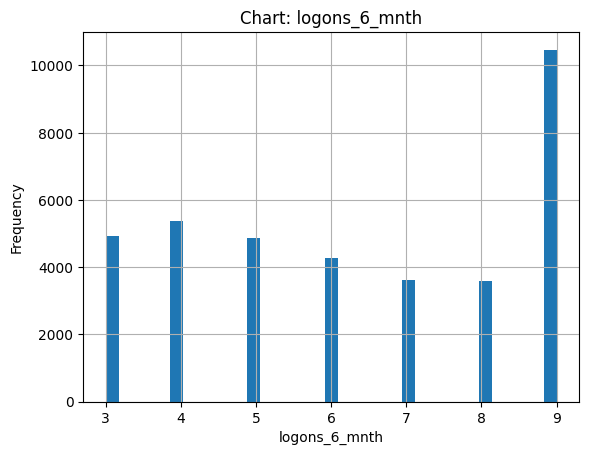

In [48]:
# Plot histograms for each numeric column with values on top
for column in test_numerical_columns:
    plt.figure()
    df_test_final[column].hist(bins=35)
    plt.title(f'Chart: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Check for outliers

In [49]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

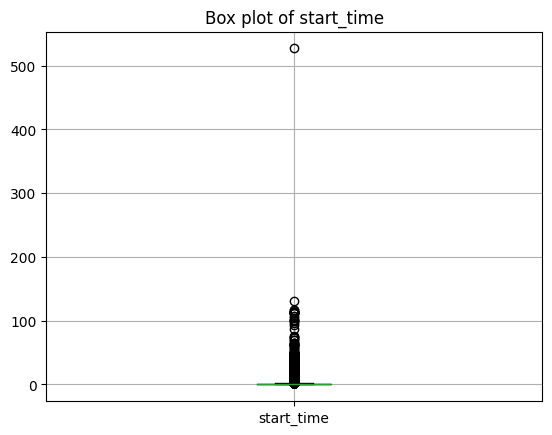

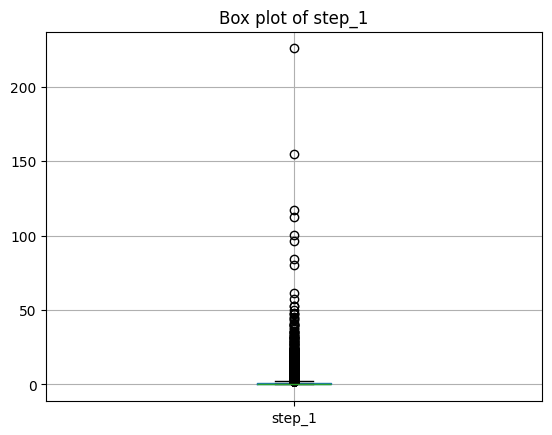

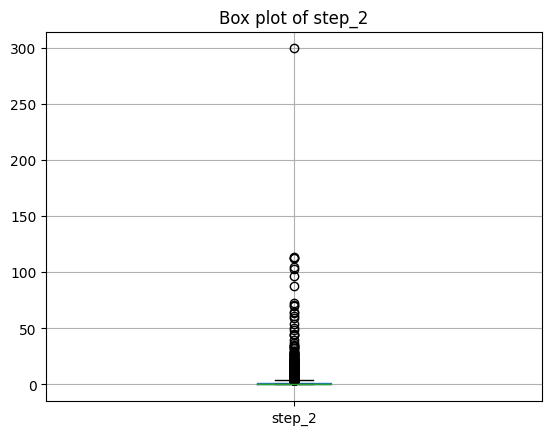

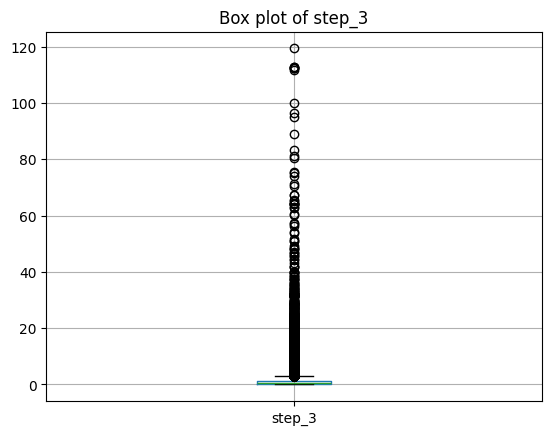

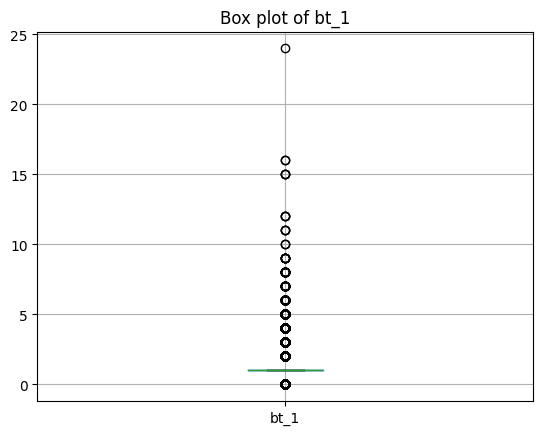

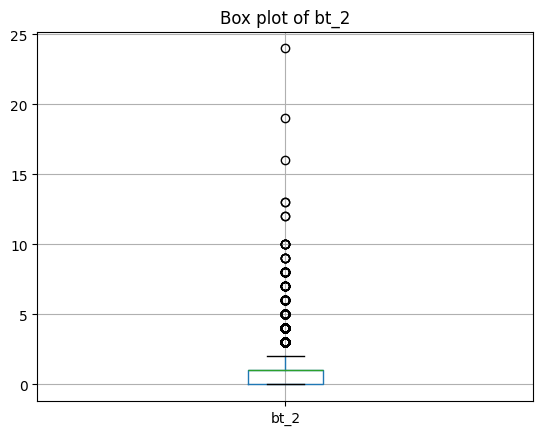

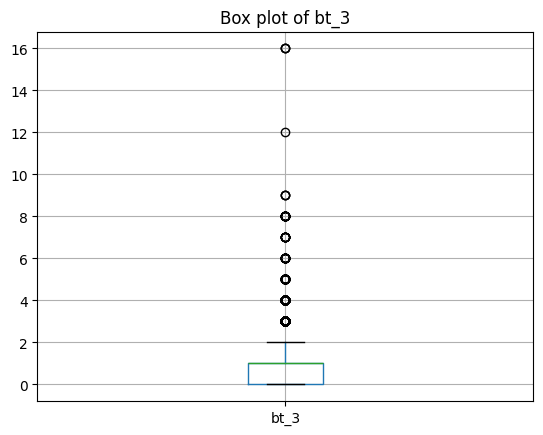

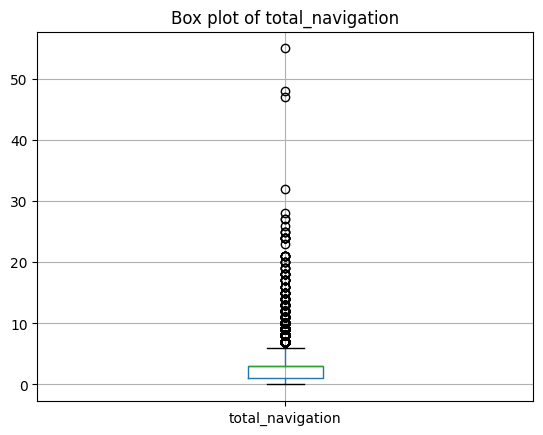

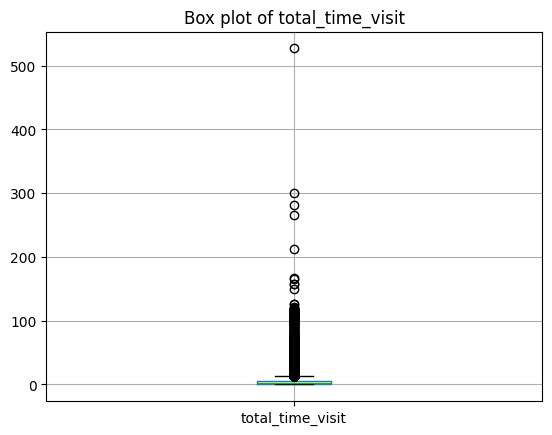

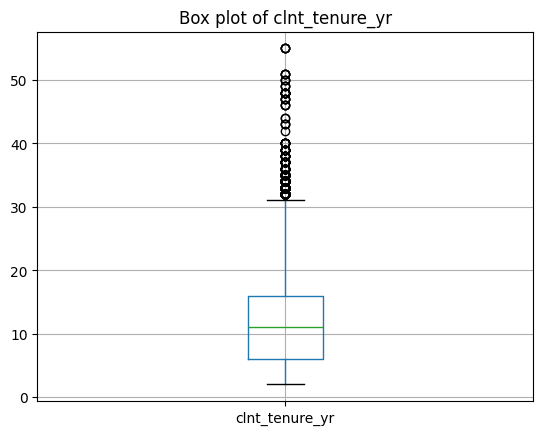

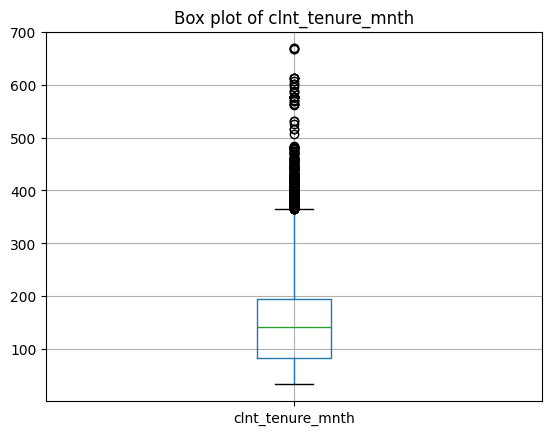

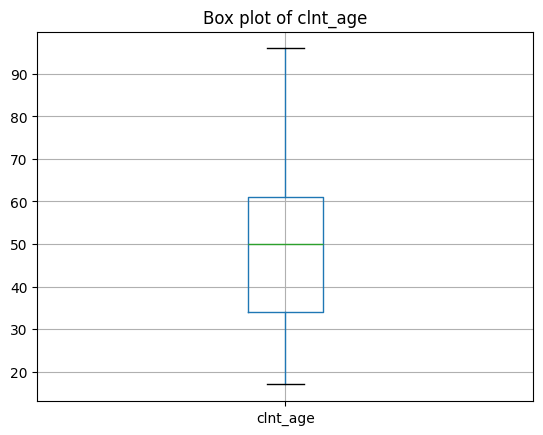

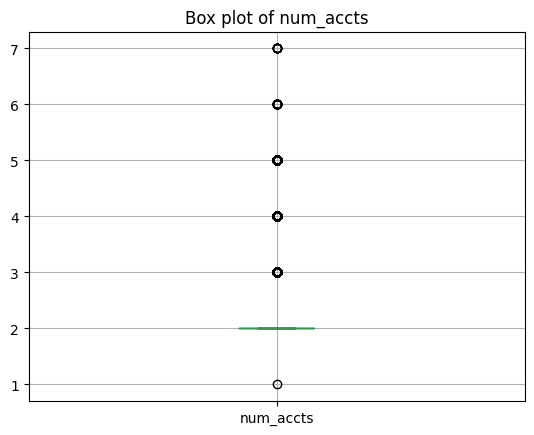

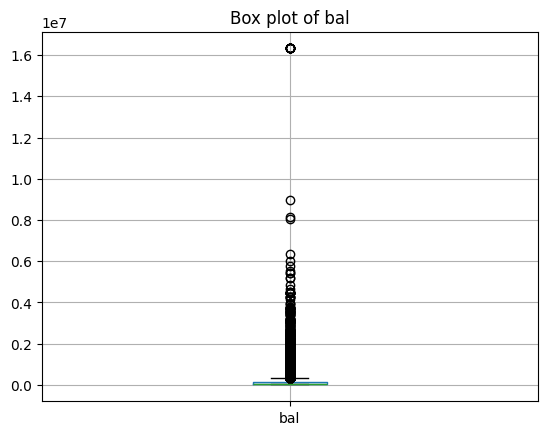

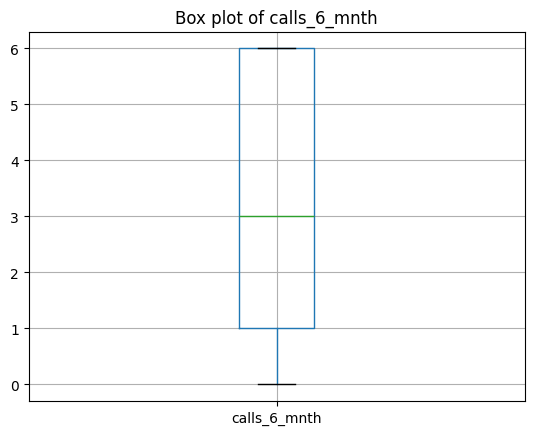

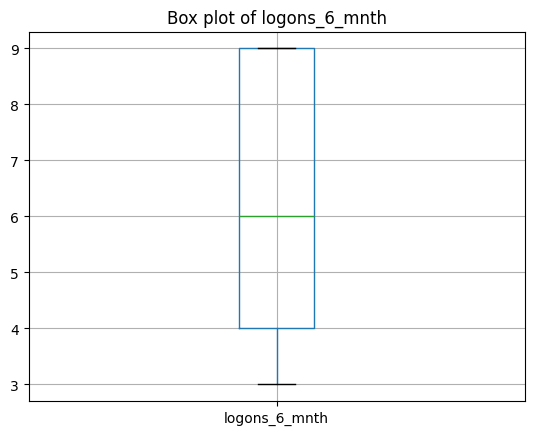

In [50]:
for column in test_numerical_columns:
    plt.figure()
    df_test_final.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

In [51]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']